In [1]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_1 = np.random.multivariate_normal(mean=(-1,1), cov=[[1,0],[0,5]], size=(100)) 
X_2 = np.random.multivariate_normal(mean=(-2,1), cov=[[4,0],[0,3]], size=(70)) 
X_22 = np.random.multivariate_normal(mean=(-4,1), cov=[[1,0],[0,2]], size=(50)) 


X_3 = np.random.multivariate_normal(mean=(4,-2), cov=[[4,2],[2,5]], size=(80)) 
X_4 = np.random.multivariate_normal(mean=(2,3), cov=[[1,0],[0,1]], size=(90)) 
X_44 = np.random.multivariate_normal(mean=(5,8), cov=[[1,0],[0,5]], size=(50)) 


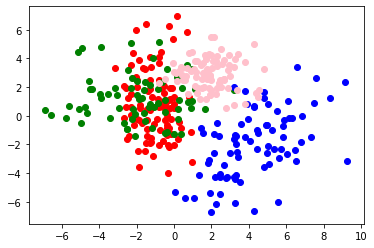

In [3]:
plt.scatter(X_1[:,0], X_1[:,1], c='r')
plt.scatter(X_2[:,0], X_2[:,1], c='g')

plt.scatter(X_3[:,0], X_3[:,1], c='b')
plt.scatter(X_4[:,0], X_4[:,1], c='pink')

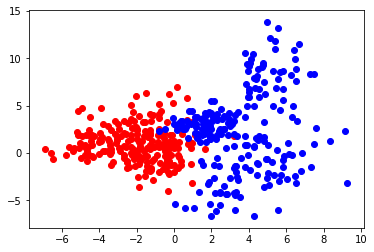

In [4]:
plt.scatter(X_1[:,0], X_1[:,1], c='r')
plt.scatter(X_2[:,0], X_2[:,1], c='r')
plt.scatter(X_22[:,0], X_22[:,1], c='r')


plt.scatter(X_3[:,0], X_3[:,1], c='b')
plt.scatter(X_4[:,0], X_4[:,1], c='b')
plt.scatter(X_44[:,0], X_44[:,1], c='b')

In [6]:
label1 = np.zeros(220)
label2 = np.ones(220)
label = np.concatenate((label1,label2))

In [7]:
X = np.concatenate((X_1,X_2,X_22, X_3,X_4,X_44))
XX1 = np.concatenate((X_1,X_2,X_22))
XX2 = np.concatenate((X_3,X_4,X_44))
X.shape

(440, 2)

In [9]:
gmm = GMM(n_components=2)
gmm.fit(X)
y = gmm.predict(X)
(y==label).sum() / label.shape[0]

0.8454545454545455

In [12]:
gmm1 = GMM(n_components=3)
gmm2 = GMM(n_components=3)

gmm1.fit(XX1)
gmm2.fit(XX2)
a = gmm1.score_samples(X)
b = gmm2.score_samples(X)
pred = np.array(a < b)

In [36]:
xxx = np.arange(8).reshape(2,4)
print(xxx)
np.argmax(xxx, axis=0)

[[0 1 2 3]
 [4 5 6 7]]


array([1, 1, 1, 1])

In [13]:
(pred==label).sum() / len(label)

0.9727272727272728

## Write our tool

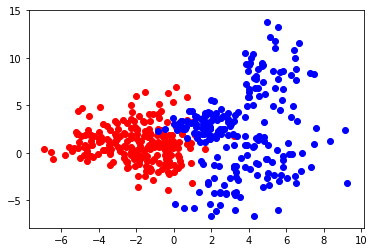

In [19]:
for i in np.unique(label):
    if (i == 0): 
        plt.scatter(X[label == i,0],X[label == i,1], c='r')
    else:
        plt.scatter(X[label == i,0],X[label == i,1], c='b')

In [37]:
class GMMClassifier():
    def __init__(self, model: list):
        ''' Based on Baysian infernece to classify
            If u want to implement a K classifier, u should input M sklearn.mixture.GaussianMixture.
            
        Input: model (list): a series of GMM models defines in sklearn.mixture.GaussianMixture
        '''
        self.model = model
        
    def fit(self, X, y):
        ''' Just like the API in sklearn
        Input: 
            X (np.ndarray[shape:(N, D)]): data
            y (np.ndarray[shape:(N,  )]): label of the coresponding data.
                                          By default, we only accept labels from 0 to K-1, 
                                            where M is the number of labels
        '''
        unique_label = np.unique(y)
        for label in unique_label:
            x = X[y==label]
            self.model[int(label)].fit(x)
            
    def predict(self, X):
        K = len(self.model)
        result = np.zeros((X.shape[0],K))
        for i, gmm in enumerate(self.model):
            result[:,i] = gmm.score_samples(X)
        
        return np.argmax(result, axis=1)

In [38]:
myGMM = GMMClassifier([GMM(n_components=3), GMM(n_components=3)])
myGMM.fit(X, label)
myy = myGMM.predict(X)

In [39]:
myy.shape

(440,)

In [41]:
def pltScatter(X, label):
    for i in np.unique(label):
        if (i == 0): 
            plt.scatter(X[label == i,0],X[label == i,1], c='r')
        else:
            plt.scatter(X[label == i,0],X[label == i,1], c='b')

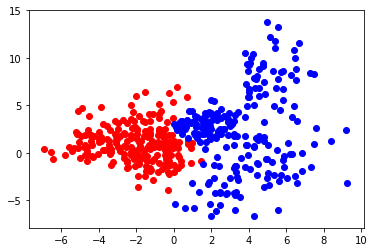

In [42]:
pltScatter(X, myy)

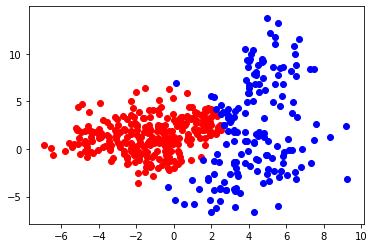

In [43]:
pltScatter(X, y)